In [28]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('./data/survey.xlsx', sheet_name='var2')

In [ ]:
df = df.dropna(how='all')
df.reset_index(drop=True, inplace=True)
df

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9
0,Big Data,Python,Методы искусственного интеллекта,Обработка изображений,Электронные таблицы,NaN,NaN,NaN,NaN
1,Методы искусственного интеллекта,Машинное обучение,Python,Обработка изображений,NaN,NaN,NaN,NaN,NaN
2,Статистика,Визуализация данных,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Статистика,Электронные таблицы,Визуализация данных,Big Data,NaN,NaN,NaN,NaN,NaN
4,Статистика,Обработка изображений,Визуализация данных,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
483,Визуализация данных,Машинное обучение,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,Ничего из перечисленного,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,Машинное обучение,Python,Визуализация данных,NaN,NaN,NaN,NaN,NaN,NaN
486,Визуализация данных,Обработка изображений,Машинное обучение,Big Data,NaN,NaN,NaN,NaN,NaN


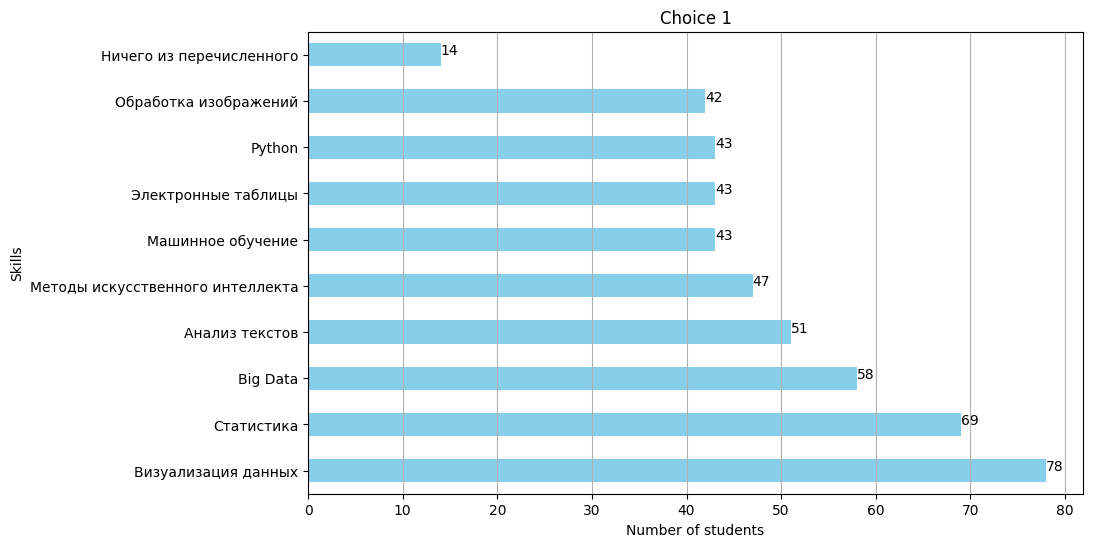

In [ ]:
df['Choice_1'].value_counts().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Choice 1')
plt.xlabel('Number of students')
plt.ylabel('Skills')
plt.grid(axis='x')
for index, value in enumerate(df['Choice_1'].value_counts()):
    plt.text(value, index, str(value))
plt.show()

In [46]:
# all selections aggregate
df_agg = pd.DataFrame()
for i in range(1, 10):
    df_agg = pd.concat([df_agg, df['Choice_' + str(i)].value_counts()], axis=1)
df_agg.columns = ['Choice_' + str(i) for i in range(1, 10)]
df_agg = df_agg.fillna(0)
df_agg = df_agg.astype(int)
df_agg = df_agg.T
df_agg = df_agg.reset_index()
df_agg

,index,Визуализация данных,Статистика,Big Data,Анализ текстов,Методы искусственного интеллекта,Машинное обучение,Электронные таблицы,Python,Обработка изображений,Ничего из перечисленного
0,Choice_1,78,69,58,51,47,43,43,43,42,14
1,Choice_2,69,33,31,47,38,51,64,43,35,2
2,Choice_3,71,41,41,24,43,44,31,42,39,0
3,Choice_4,41,37,35,24,34,28,29,33,29,0
4,Choice_5,24,28,15,23,27,22,19,23,15,0
5,Choice_6,11,15,13,10,17,14,11,18,10,0
6,Choice_7,11,15,8,8,12,11,3,6,11,0
7,Choice_8,4,3,5,8,7,4,6,6,7,0
8,Choice_9,2,6,4,3,2,3,3,6,6,0


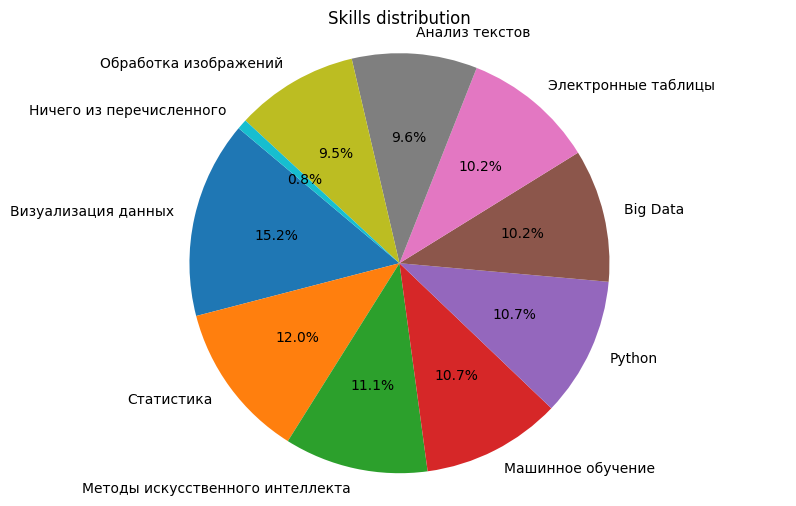

In [48]:
# aggregate plot pie
pie_df = df_agg.iloc[:, 1:].sum(axis=0)
pie_df = pie_df.reset_index()
pie_df.columns = ['Skills', 'Number of students']
pie_df = pie_df.sort_values(by='Number of students', ascending=False)
plt.figure(figsize=(10, 6))
plt.pie(pie_df['Number of students'], labels=pie_df['Skills'], autopct='%1.1f%%', startangle=140)
plt.title('Skills distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [50]:
pie_df.head(10)

,Skills,Number of students
0,Визуализация данных,311
1,Статистика,247
4,Методы искусственного интеллекта,227
5,Машинное обучение,220
7,Python,220
2,Big Data,210
6,Электронные таблицы,209
3,Анализ текстов,198
8,Обработка изображений,194
9,Ничего из перечисленного,16
